In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [28]:
data = {
    'Age': [25, 30, np.nan, 45, 50, 22, 35, 40, 200, 28, 33, np.nan, 55, 60, 180, 70, 42, 38, 29, 31],
    'Income': [50000, 60000, 70000, np.nan, 90000, 40000, 55000, 65000, 1000000, 52000, 61000, 72000, np.nan, 85000, 30000, 95000, 58000, 63000, 54000, 62000],
    'Gender': ['Male', 'Female', 'Others', 'Female', 'Male', 'Others', 'Male', 'Female', 'Male', 'Female', 'Others', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Education': ['Bachelor', np.nan, 'High School', 'Bachelor', 'Master', 'High School', 'Bachelor', 'Master', 'High School', 'Bachelor', 'Master', 'High School', 'Bachelor', 'Master', 'High School', 'Bachelor', 'Master', 'High School', 'Bachelor', 'Master'],
    'Purchased': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
}

df = pd.DataFrame(data)


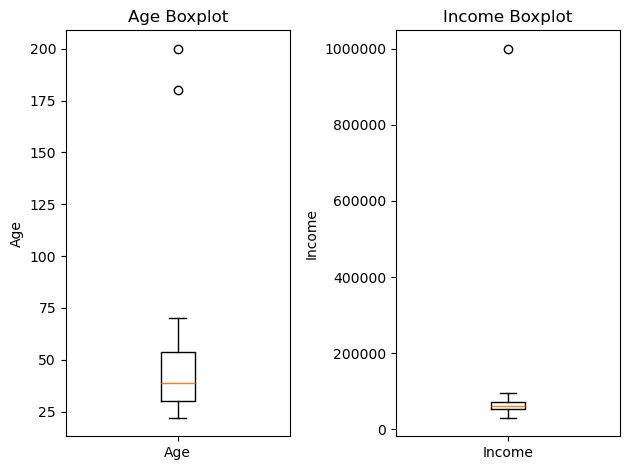

In [29]:
# Age boxplot
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'].dropna())
plt.title('Age Boxplot')
plt.ylabel("Age")
plt.xticks([1], ['Age'])

# Income boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['Income'].dropna())
plt.title('Income Boxplot')
plt.ylabel("Income")
plt.xticks([1], ['Income'])

# Force normal number formatting (remove scientific notation)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()


In [30]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

print("Dataset after Handling Missing Values:")
display(df)


Dataset after Handling Missing Values:


,Age,Income,Gender,Education,Purchased
0,25.0,50000.0,Male,Bachelor,0
1,30.0,60000.0,Female,Bachelor,0
2,39.0,70000.0,Others,High School,0
3,45.0,61500.0,Female,Bachelor,1
4,50.0,90000.0,Male,Master,0
5,22.0,40000.0,Others,High School,0
6,35.0,55000.0,Male,Bachelor,0
7,40.0,65000.0,Female,Master,1
8,200.0,1000000.0,Male,High School,0
9,28.0,52000.0,Female,Bachelor,0


In [31]:
# One-hot encoding for Gender
df = pd.get_dummies(df, columns=['Gender'], prefix='Gen', drop_first=True, dtype=int)

# Label encoding for Education
education_map = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2
}

# Apply mapping
df['Education'] = df['Education'].map(education_map)
print("Dataset after Encoding:")
display(df)


Dataset after Encoding:


,Age,Income,Education,Purchased,Gen_Male,Gen_Others
0,25.0,50000.0,1,0,1,0
1,30.0,60000.0,1,0,0,0
2,39.0,70000.0,0,0,0,1
3,45.0,61500.0,1,1,0,0
4,50.0,90000.0,2,0,1,0
5,22.0,40000.0,0,0,0,1
6,35.0,55000.0,1,0,1,0
7,40.0,65000.0,2,1,0,0
8,200.0,1000000.0,0,0,1,0
9,28.0,52000.0,1,0,0,0


In [32]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)

# Apply to Age and Income
df['Age'] = cap_outliers(df['Age'])
df['Income'] = cap_outliers(df['Income'])


In [33]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [34]:
scaler = StandardScaler()
X_train[['Age', 'Income']] = scaler.fit_transform(X_train[['Age', 'Income']])
X_test[['Age', 'Income']] = scaler.transform(X_test[['Age', 'Income']])


In [8]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


NameError: name 'SMOTE' is not defined